# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Задача:

- Изучить данные, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

### Загрузка библиотек и изучение данных

In [1]:
import pandas as pd
import matplotlib as plt


In [2]:
# загрузим файл с данными и изучим датафрейм

realty = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

realty.head(10) #выведем первые 10 строк датасета

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
realty.info() #выведем общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

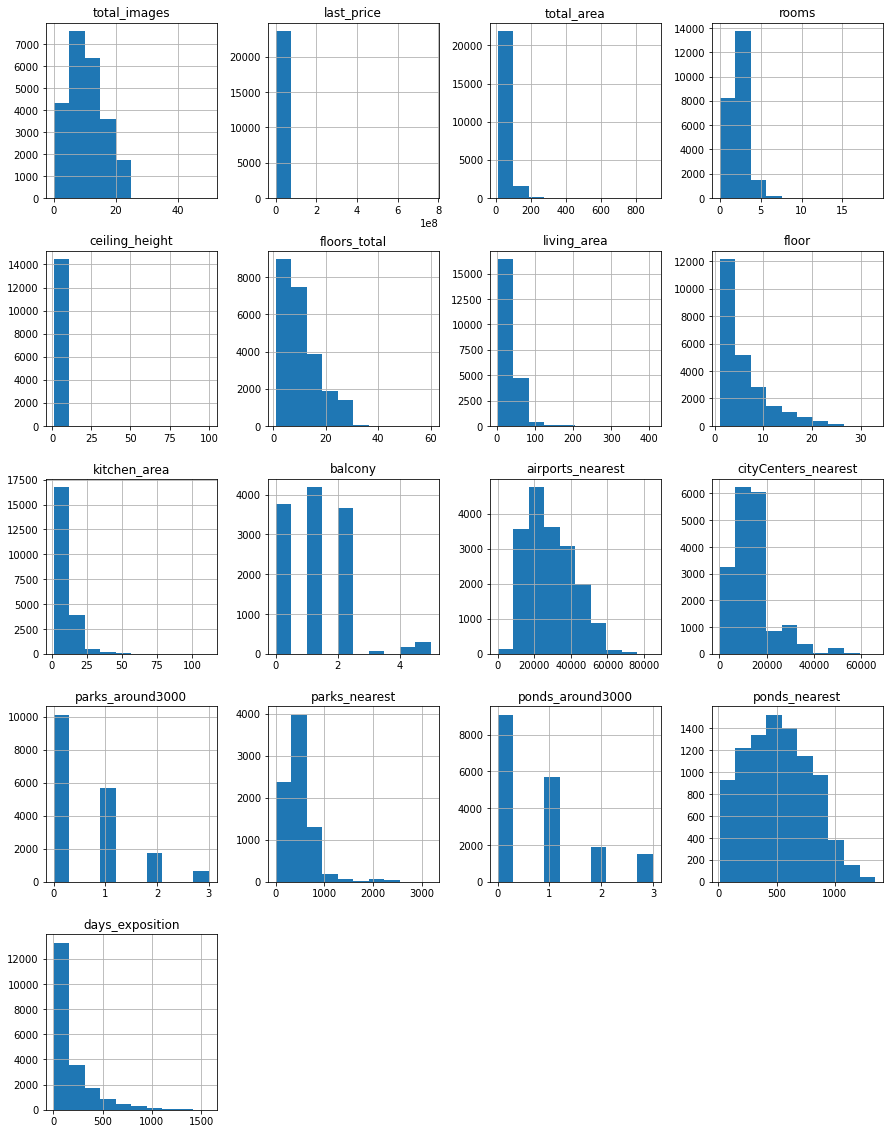

In [5]:
realty.hist(bins=10, figsize=(15, 20)) #построим гистограмму для всех числовых значений таблицы

Первичное изучение датасета показало наличие большого числа пропусков и выбросов данных. Типы данных части столбцов указаны некорректно.   


## Предобработка данных

Переведем тип данных нескольких столбцов в int - в тех случаях, где либо тип float не уместен, либо после точки стоит 0. Тип данных столбца is_apartment изменим на булевый.

In [99]:
realty['ponds_around3000'] = realty['ponds_around3000'].astype('Int64') # число прудов в радиусе 3 км
realty['parks_around3000'] = realty['parks_around3000'].astype('Int64') # число парков в радиусе 3 км
realty['airports_nearest'] = realty['airports_nearest'].astype('Int64') # расстояние до ближайшего аэропорта
realty['parks_nearest'] = realty['parks_nearest'].astype('Int64') # расстояние до ближайшего парка
realty['ponds_nearest'] = realty['ponds_nearest'].astype('Int64') # расстояние до ближайшего пруда
realty['balcony'] = realty['balcony'].astype('Int64') # наличие балкона
realty['floors_total'] = realty['floors_total'].astype('Int64') # число этажей
realty['last_price'] = realty['last_price'].astype('Int64') # стоимость



In [97]:
# рассчитаем доли пропусков по каждому столбцу и выведем их на экран

pd.DataFrame(round(realty.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,12.900000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


**Предобработка столбца is_apartment**

In [8]:
realty['is_apartment'].value_counts() # посчитаем число уникальных значения столбца is_apartment


False    2725
True       50
Name: is_apartment, dtype: int64

Пропуски в столбце свидетельствую о том, что скорее всего недвижимость не является апартаментами. Пропущенные значения заменим на False.

In [9]:
realty['is_apartment'] = realty['is_apartment'].fillna(False)

In [10]:
realty['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [11]:
# изменим тип данных на bool

realty['is_apartment'] = realty['is_apartment'].astype('bool')

**Предобработка столбца parks_nearest**


In [12]:
#изучим уникальные значение столбца parks_nearest

print(realty['parks_nearest'].unique())
print(realty['parks_nearest'].value_counts())



<IntegerArray>
[ 482, <NA>,   90,   84,  112,  310,  294,  590,  420,  759,
 ...
  757,  268,   80, 2768, 2009,  847,  760, 1167,    4, 2984]
Length: 996, dtype: Int64
441     67
392     41
173     41
456     40
471     32
        ..
1191     1
2209     1
1211     1
92       1
4        1
Name: parks_nearest, Length: 995, dtype: Int64


Данные показывают расстояние до ближайшего парка. Если данные пропущены, скорее всего рядом с объектом недвижимости парка нет. Пропуски в данном столбце оставим.

**Предобработка столбца ponds_nearest**

In [13]:
print(realty['ponds_nearest'].unique())

realty['ponds_nearest'].value_counts()

<IntegerArray>
[ 755, <NA>,  574,  234,   48,  553,  298,   96,  296,  859,
 ...
 1156,  999,  986,  188,   30, 1077,  827,  959,   40, 1134]
Length: 1097, dtype: Int64


427     70
454     41
153     40
433     39
474     37
        ..
948      1
1023     1
884      1
967      1
188      1
Name: ponds_nearest, Length: 1096, dtype: Int64

Данные показывают расстояние до ближайшего пруда. Если данные пропущены, скорее всего рядом с объектом недвижимости пруда нет. Пропуски в данном столбце оставим.

**Предобработка столбца balcony**

In [14]:
print(realty['balcony'].unique())

realty['balcony'].value_counts()

<IntegerArray>
[<NA>, 2, 0, 1, 5, 4, 3]
Length: 7, dtype: Int64


1    4195
0    3758
2    3659
5     304
4     183
3      81
Name: balcony, dtype: Int64

Отсутствующие данные заменим на 0, так как скорее всего в этом случае в объекте недвижимости балкона нет.

In [15]:
realty['balcony'] = realty['balcony'].fillna(0)


**Предобработка столбца first_day_exposition**

In [16]:
#Переведем столбец первого дня на сервисе в формат datetime 

realty['first_day_exposition'] = pd.to_datetime(
    realty['first_day_exposition'], format='%Y-%m-%d'
)


**Предобработка столбца floors_total**

In [17]:
realty['floors_total'].isna().value_counts() # изучим данные столбца

False    23613
True        86
Name: floors_total, dtype: int64

In [18]:
#удалим строки с пропущенными значениями в floors_total, так как их число незначительно 

realty = realty.dropna(subset=['floors_total']) 

**Предобработка столбца locality_name**

In [19]:
# изучим данные столбца 

realty['locality_name'].isna().value_counts() 

False    23565
True        48
Name: locality_name, dtype: int64

In [20]:
#удалим пропущенные значения в locality_name, так как из число незначительно 

realty = realty.dropna(subset=['locality_name']) 

**Предобработка столбца living_area**  

In [21]:
# посмотрим корреляцию показателя living_area от показателя количества комнат

realty['living_area'].corr(realty['rooms']) 

0.846116853039896

Так как корреляция высокая, заполним пропуски медианным значением по каждому типу из столбца rooms

In [22]:
realty['rooms'].unique() #посмотрим уникальные значение столбца rooms

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [23]:
# напишем цикл

for n in realty['rooms'].unique():
    median = realty.loc[realty['rooms'] == n, 'living_area'].median()
    realty.loc[(realty['living_area'].isna()) & (realty['rooms'] == n), 'living_area'] = median 
    




**Предобработка столбца kitchen_area**

In [24]:
realty['kitchen_area'].isna().value_counts() 

False    21343
True      2222
Name: kitchen_area, dtype: int64

Заполним пропуски медианным значением:

In [25]:
# напишем цикл

for n in realty['rooms'].unique():
    median = realty['kitchen_area'].median()
    realty.loc[realty['kitchen_area'].isna(), 'kitchen_area'] = median
    
    
    

**Предобработка столбца locality_name**

In [26]:
#чтобы обнаружить неявные дубликаты в списке населенных пунктов, выведем на экран их уникальные значения по алфавиту

locality_unique = realty['locality_name'].unique()
sorted(locality_unique)



['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [27]:
# удалим из названий типы населенных пунктов и уберем лишние пробелы

realty['locality_name'] = realty['locality_name'].str.replace('деревня', '').str.strip() 
realty['locality_name'] = realty['locality_name'].str.replace('поселок', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('поселок', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('посёлок', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('село', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('городского типа', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('городской', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('коттеджный', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('садовое товарищество', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('станции', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('при железнодорожной станции', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('при железнодорожной', '').str.strip()
realty['locality_name'] = realty['locality_name'].str.replace('садоводческое некоммерческое товарищество', '').str.strip()


In [28]:
#проверим обновленный список
locality_unique = realty['locality_name'].unique()

sorted(locality_unique)

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жил',
 'Жилгородок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',
 'Кало

Создадим новый столбец по типу населенного пункта

In [29]:
#напишем функцию, которая сгруппирует расстояние до центра

def city_center(row):
    distance = row['cityCenters_nearest']
    if distance < 5000:
        return 'центр'
    if distance >= 5000 and distance < 20000:
        return 'окраина'
    if distance >= 20000 and distance < 40000:
        return 'ближайший пригород'
    if distance >= 40000:
        return 'дальний пригород'
    

realty['city_type'] = realty.apply(city_center, axis=1)

**Предобработка столбца cityCenters_nearest**

In [30]:
# заполним пропуски медианным значением в завимимости от типа населенного пункта

for n in realty['city_type'].unique():
    median = realty.loc[realty['city_type'] == n, 'cityCenters_nearest'].median()
    realty.loc[(realty['cityCenters_nearest'].isna()) & (realty['city_type'] == n), 'cityCenters_nearest'] = median
    

**Предобработка столбца airports_nearest**

In [31]:
# заполним пропуски в airports_nearest медианой по типу населенного пункта. 
# в случае отсутствия населенного пункта заполним пропуск общим медианным значением столбца airports_nearest  

for n in realty['city_type'].unique():
    try:
        median = realty.loc[realty['city_type'] == n, 'airports_nearest'].median()
        median_1 = realty['airports_nearest'].median()
        realty.loc[(realty['airports_nearest'].isna()) & (realty['city_type'] == n), 'airports_nearest'] = median
    except:
        realty.loc[realty['airports_nearest'].isna(), 'airports_nearest'] = median_1

**Предобработка столбца ceiling_height**

Пустые значения ceiling_height заполним медианным значением в зависимости от расстояния до центра.

In [32]:
for n in realty['city_type'].unique():
    median = realty.loc[realty['city_type'] == n, 'ceiling_height'].median()
    realty.loc[(realty['ceiling_height'].isna()) & (realty['city_type'] == n), 'ceiling_height'] = median
               
               
               

**Изучение аномалий**

**ceiling_height**

<AxesSubplot:>

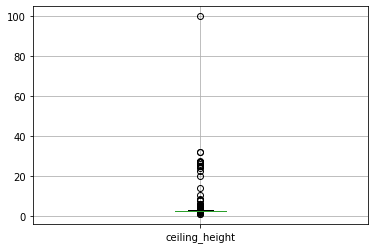

In [33]:
# построим диаграмму размаха для ceiling_height

realty.boxplot('ceiling_height')

Большая часть значений лежит в диапазоне ниже 3.1 и выше 2.3. Удалим оставшиеся выбросы. 

In [34]:
realty = realty.query('(ceiling_height < 3.1 and ceiling_height > 2.3) or ceiling_height.isna()')

<AxesSubplot:>

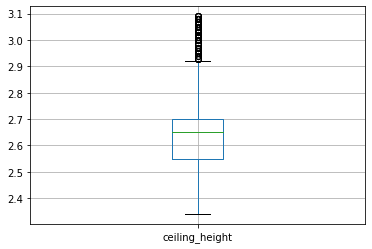

In [35]:
#построим еще раз диаграмму размаха

realty.boxplot('ceiling_height')

**total_area**

Изучим аномалии столбца total_area, сразу построив диаграмму размаха

<AxesSubplot:>

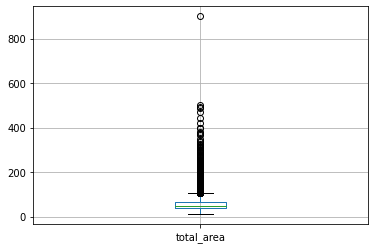

In [36]:
realty.boxplot('total_area')

Большая часть значений лежит в диапазоне меньше 105. Перезапишем датасет, исключив строки с выбросами. 

In [37]:
realty = realty.query('total_area < 105')

<AxesSubplot:>

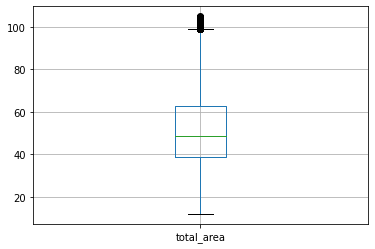

In [38]:
#построим еще раз диаграмму размаха

realty.boxplot('total_area')

**floors_total**

<AxesSubplot:>

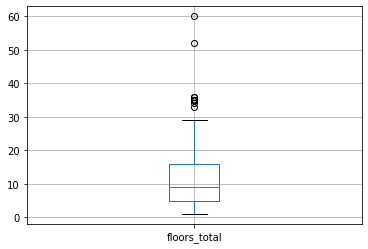

In [39]:
#построим диаграмму размаха для floors_total

realty.boxplot('floors_total')

На графике видны явные выбросы. Избавимся от них, ограничив данные домами в 30 этажей. 

In [40]:
realty = realty.query('floors_total < 30')

**kitchen_area**

<AxesSubplot:>

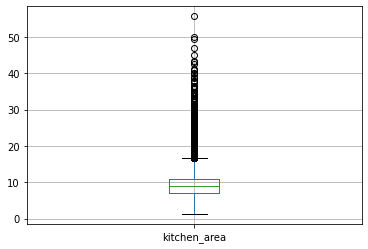

In [41]:
#построим диаграмму размаха для kitchen_area

realty.boxplot('kitchen_area')



Избавимся от выбросов, ограничив площадь кухни в 30 кв.метров.

In [42]:
realty = realty.query('kitchen_area < 30')

<AxesSubplot:>

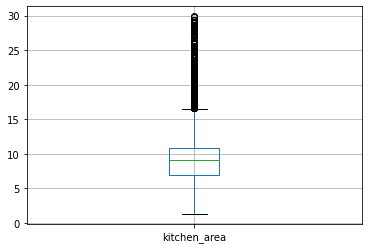

In [43]:
#построим еще раз диаграмму размаха

realty.boxplot('kitchen_area')

**days_exposition**

<AxesSubplot:>

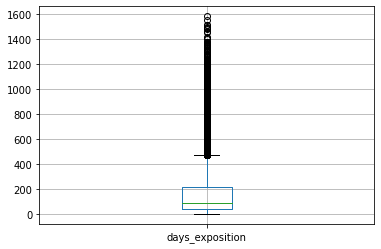

In [44]:
realty.boxplot('days_exposition')

Избавимся от выбросов, ограничив срок объявления показателем 800. 

In [45]:
realty = realty.query('days_exposition < 800')

<AxesSubplot:>

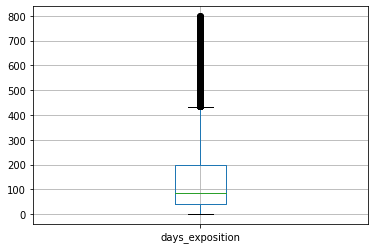

In [46]:
#построим еще раз диаграмму размаха

realty.boxplot('days_exposition')

**last_price**

<AxesSubplot:>

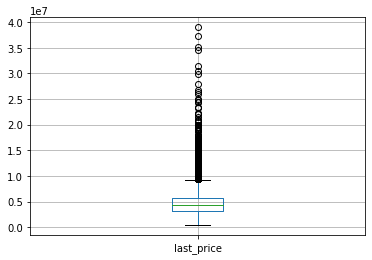

In [47]:
#построим диаграмму размаха для kitchen_area

realty.boxplot('last_price')

In [48]:
realty['last_price'].describe()

count    1.746300e+04
mean     4.759330e+06
std      2.507043e+06
min      4.300000e+05
25%      3.250000e+06
50%      4.250000e+06
75%      5.672500e+06
max      3.900000e+07
Name: last_price, dtype: float64

Избавимся от выбросов, ограничив стоимость показателем 11000000.

In [49]:
realty = realty.query('last_price < 11000000')

<AxesSubplot:>

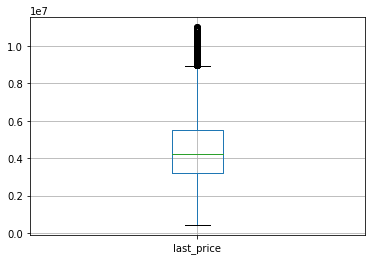

In [50]:
#построим еще раз диаграмму размаха

realty.boxplot('last_price')

**Проверка на явные дубликаты**

In [51]:
# выведем на экран число явных дубликатов

realty.duplicated().sum()


0

Число явных дубликатов - 0

**Добавление новых столбцов**

**Цена одного квадратного метра**

In [52]:
# разделим столбец last_price на total_area и преобразуем данные до Int

realty['metre_price'] = (realty['last_price'] / realty['total_area']).astype('Int64')




**День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [53]:
realty['day_expo_true'] = realty['first_day_exposition'].dt.weekday

**Месяц публикации объявления**

In [54]:
realty['month_ad'] = realty['first_day_exposition'].dt.month

**Год публикации объявления**

In [55]:
realty['year_ad'] = realty['first_day_exposition'].dt.year

**Тип этажа квартиры (значения — «первый», «последний», «другой»)**

In [56]:
def floor_type(row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
realty['floor_type'] = realty.apply(floor_type, axis=1)



**Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)**

In [57]:
realty['city_centre_km'] = realty['cityCenters_nearest'] / 1000

In [58]:
realty['city_centre_km'] = round(realty['city_centre_km'])

realty['city_centre_km'] = realty['city_centre_km'].astype('Int64')



**Вывод**:\
На этапе предобработки данных мы: 
- заполнили пропуски медианными значениями;
- удалили часть строк с пропусками - в столбцах, где либо их было немного, либо их удаление допустимо с т.з. дальнейших расчетов;
- удалили неявные дубликаты, которые обнаружили в названиях населенных пунтков;
- исследовали аномалии и удалили часть строк, значения которых признали выбросами.

## Исследовательский анализ данных

### Общая площадь

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

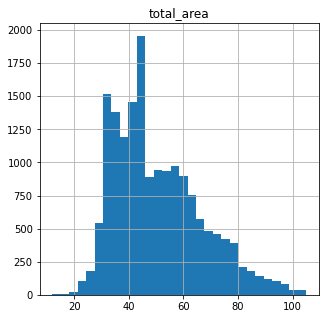

In [59]:
#простроим гистограмму рассеяния

realty.hist('total_area', bins=30, grid=True, figsize = (5,5))

Наибольшее число значений площади сосредоточено в диапазоне 41-42 кв.м.
Также отмечен пик в значении около 30 кв.м.
Меньше всего в датасете больших квартир более 100 кв.м. и очень маленьких - до 20 кв.м.



### Жилая площадь

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

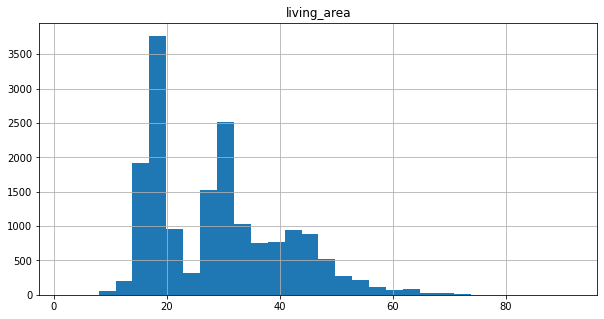

In [60]:
realty.hist('living_area', bins=30, grid=True, figsize = (10,5))

Распределение жилой площади имеет два пика: в области значений 20 кв.м и 30 кв.м.

### Площадь кухни

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

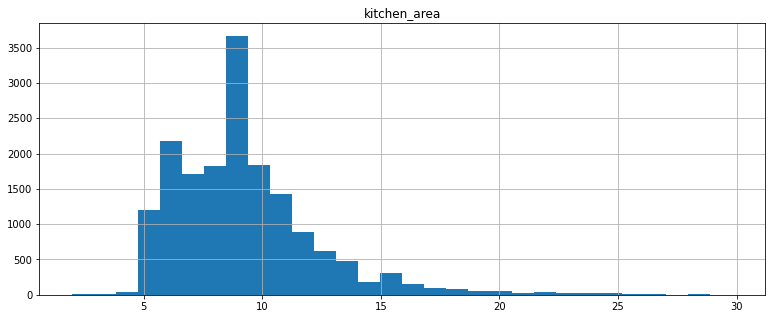

In [61]:
realty.hist('kitchen_area', bins=30, grid=True, figsize = (13,5))

В датасете больше всего квартир представлено с площадью кухни 7-8 кв.м.

### Цена объекта

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

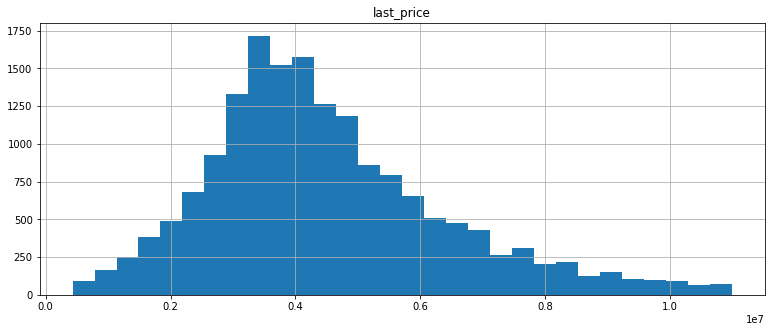

In [62]:
realty.hist('last_price', bins=30, grid=True, figsize = (13,5))

Стоимость большей части квартир находится в диапазоне 3-5 млн рублей. 

### Количество комнат

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

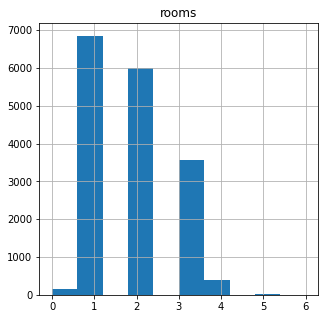

In [63]:
realty.hist('rooms', bins=10, grid=True, figsize = (5,5))

Число однокомнатных и двухкомнатных квартир в датасете примерно одинаково. Меньше всего в датасете четырехкомнатных квартир.

### Высота потолков

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

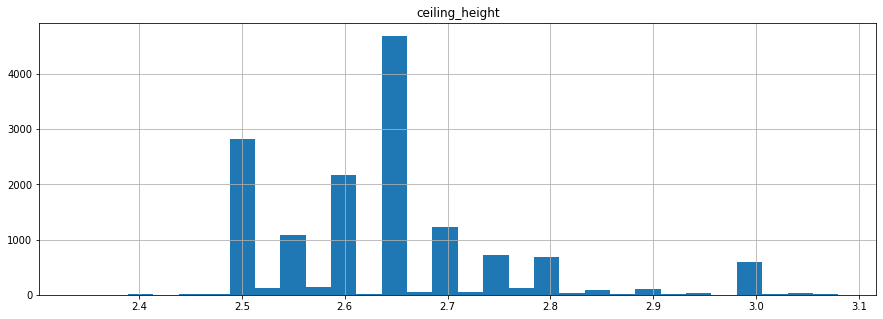

In [64]:
realty.hist('ceiling_height', bins=30, grid=True, figsize = (15,5))

Большая часть квартир в датасете имеет высоту потолков 2,6-2,7 м. 

### Этаж квартиры


array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

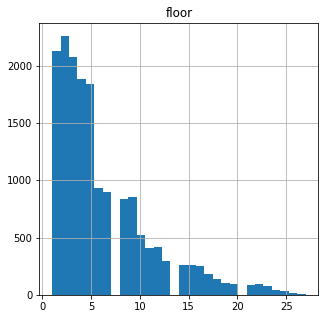

In [65]:
#построим диаграмму рассеяния

realty.hist('floor', bins=30, grid=True, figsize = (5,5))

In [66]:
#сгруппируем данные по этажу и выведем рэнкинг

realty['floor'].value_counts().head(10)



2     2259
1     2127
3     2073
4     1882
5     1841
6      935
7      901
9      852
8      834
10     525
Name: floor, dtype: int64

Больше всего в датасете квартир на 2-м этаже. На втором месте - квартир на 1-м этаже. Третье место за квартирами на 3 этаже. 

<AxesSubplot:title={'center':'Распределение объявлений по типу этажа'}, ylabel='count'>

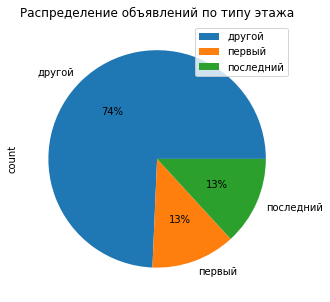

In [67]:
#Сгруппируем данные по столбцу floor_type и построим круговую диаграмму

floor_table = realty.pivot_table(index='floor_type', values='floor', aggfunc = 'count')
floor_table.columns = ['count']
floor_table.plot(y='count', kind='pie', figsize = (5,5), autopct='%1.0f%%', title='Распределение объявлений по типу этажа')

13% объявлений предлагают квартиры на 1 этаже, 13% - на последнем. 

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

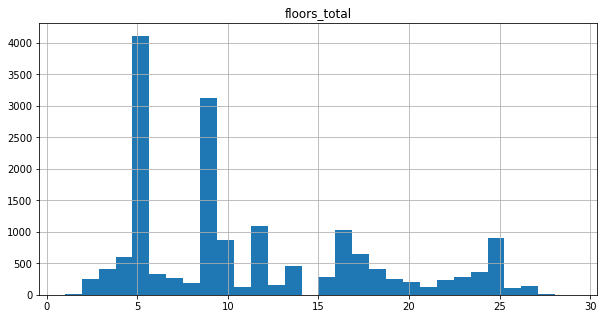

In [68]:
# посмтроим гистрограмму распределения кол-ва этажей 

realty.hist('floors_total', bins=30, grid=True, figsize = (10,5))

Больше всего в датасете 5-этажных домов. На втором месте - 9-этажные. 

In [69]:
#построим сводную таблицу средней этажности относительно типа населенного пункта

In [70]:
realty.pivot_table(index = 'city_type', values = 'floors_total')

,floors_total
city_type,
ближайший пригород,9.017876
дальний пригород,6.107759
окраина,12.617887
центр,6.07837


В ближайшем пригороде представлено больше всего 9-этажных домов.
В дальнем пригороде - 6-этажных.
На окраине Санкт-Петербурга - 12-этажных.
В центре - 6-этажных. 

### Расстояние до центра города


array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

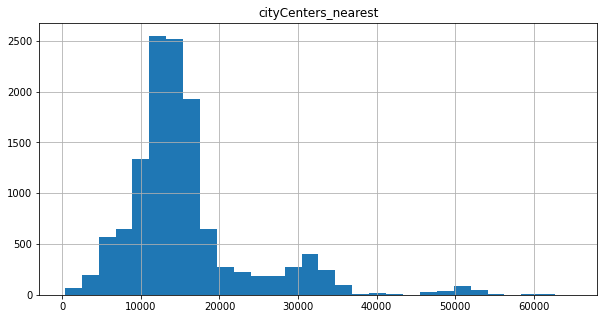

In [71]:
# посмотроим гистрограмму расстояния до центра города

realty.hist('cityCenters_nearest', bins=30, grid=True, figsize = (10,5))

### Расстояние до ближайшего аэропорта


array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

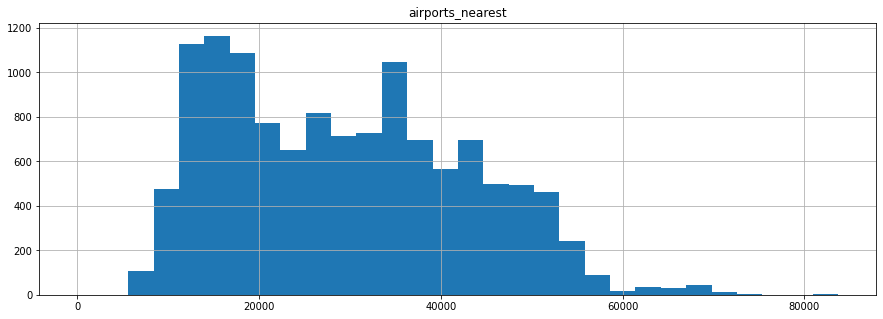

In [72]:
realty.hist('airports_nearest', bins=30, grid=True, figsize = (15,5))

В датаесете больше всего квартир, которые располагаются в 17-18 км от аэропорта. На втором месте квартиры, которые находятся от аэропорта на расстоянии 36-37 км. 

### Расстояние до ближайшего парка


array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

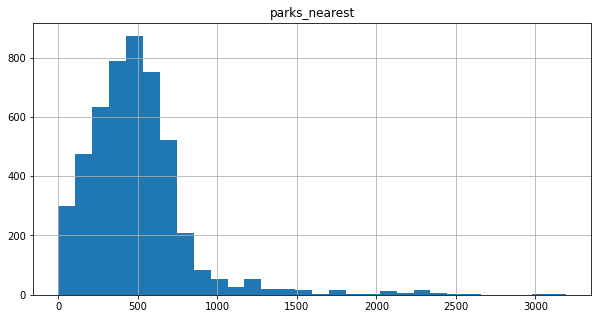

In [73]:
realty.hist('parks_nearest', bins=30, grid=True, figsize = (10,5))

В датасете представлено не так много квартир, рядом с которыми есть парки. Распределение таких квартир по расстоянию до парков не имеет резких пиков. Большая часть значений лежит в диапазоне 200-600 метров. 

### День и месяц публикации объявления

[[<AxesSubplot:title={'center':'day_expo_true'}>]]
[[<AxesSubplot:title={'center':'month_ad'}>]]


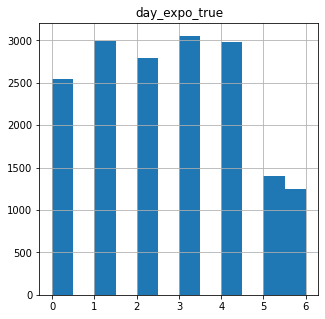

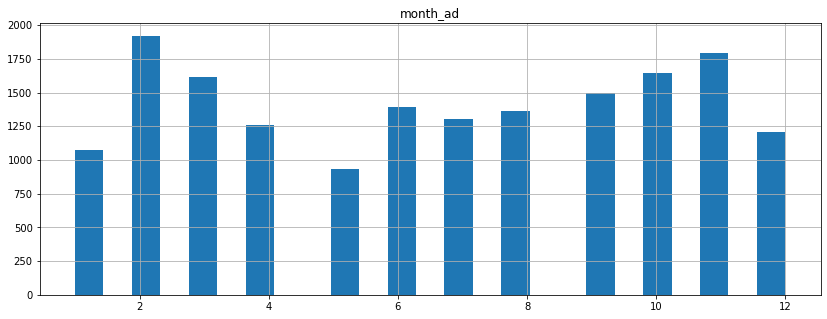

In [74]:
# построим и изучим гистограммы распределения объявлений по дню и месяцу


print(realty.hist('day_expo_true', bins=12, grid=True, figsize = (5,5)))
print(realty.hist('month_ad', bins=25, grid=True, figsize = (14,5)))

На выходных публикуют в два раза меньше объявлений, чем в будни. Самые активные месяцы публикаций - февраль, март и ноябрь. Меньше всего объявлений публикуют в мае, январе и декабре. 



### Скорость продажи квартир

Изучим, как быстро продавались квартиры.

- Построим гистограмму.
- Посчитаем среднее и медиану.
- Опишем, сколько времени обычно занимает продажа. 

<AxesSubplot:>

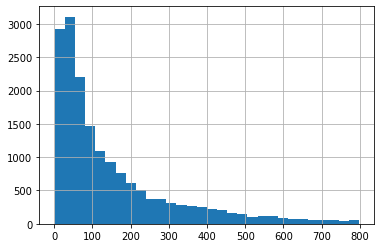

In [75]:
# построим гистограмму скорости продаж квартир

realty['days_exposition'].hist(bins=30)

Видно, что большая часть квартир продавалась за период до 500 дней.

count    16998.000000
mean       147.814096
std        159.432730
min          1.000000
25%         42.000000
50%         85.000000
75%        198.000000
max        798.000000
Name: days_exposition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


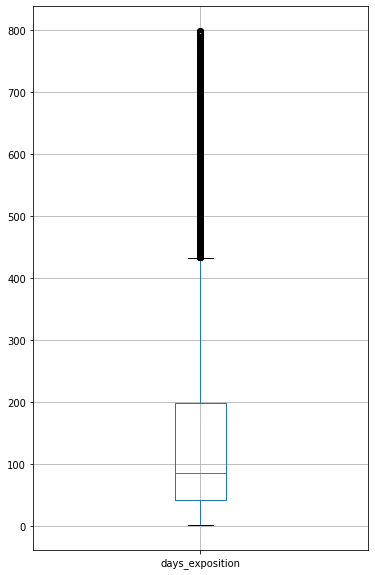

In [76]:
#построим диаграмму размаха и запросим список характерных значений

print(realty['days_exposition'].describe())

print(realty.boxplot('days_exposition', figsize=(6,10)))

- Медианное значение числа дней, которые требовались для продажи - 85. Среднее - 147.
- Быстрые продажи находятся в 1 квартиле и составляют период до 42 дней. Долгими являются продажи из 4 квартиля - от 199 дней.





Посмотрим, сколько дней в среднем требуется для продажи квартиры в зависимости от типа территории. 

In [78]:
realty_days = realty[['city_type','days_exposition']]

realty_days.pivot_table(index='city_type', values='days_exposition')

,days_exposition
city_type,
ближайший пригород,152.079632
дальний пригород,163.452586
окраина,142.108993
центр,200.523511


Большой разницы по среднему сроку продажи квартиры между типами территории нет.

### Факторы, которые  влияют на стоимость

Изучим факторы, которые больше всего влияют на стоимость объекта.



In [79]:
#создадим новый датафрейс из столбцов общей площади, жилой площади, площади кухни, количества комнат, этажа и даты размещения

factors_price = realty[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'first_day_exposition']]
factors_price.head(10)

#посмтроит таблицу всех корреляций
factors_price.corr()



,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.671455,0.510653,0.440596,0.410097
total_area,0.671455,1.000000,0.889400,0.364930,0.804395
living_area,0.510653,0.889400,1.000000,0.069553,0.908745
kitchen_area,0.440596,0.364930,0.069553,1.000000,-0.026042
rooms,0.410097,0.804395,0.908745,-0.026042,1.000000


Построим диаграммы корреляций для разных факторов

<AxesSubplot:title={'center':'Общая площадь'}, xlabel='total_area', ylabel='last_price'>

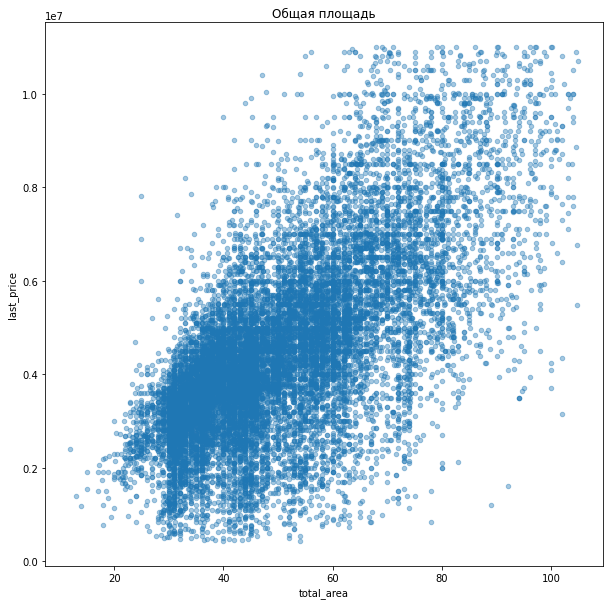

In [80]:
#корреляция цены от общей площади

factors_price.plot(x='total_area', y='last_price', kind='scatter', alpha=0.4, title='Общая площадь', figsize=(10,10)) 

<AxesSubplot:title={'center':'Жилая площадь'}, xlabel='living_area', ylabel='last_price'>

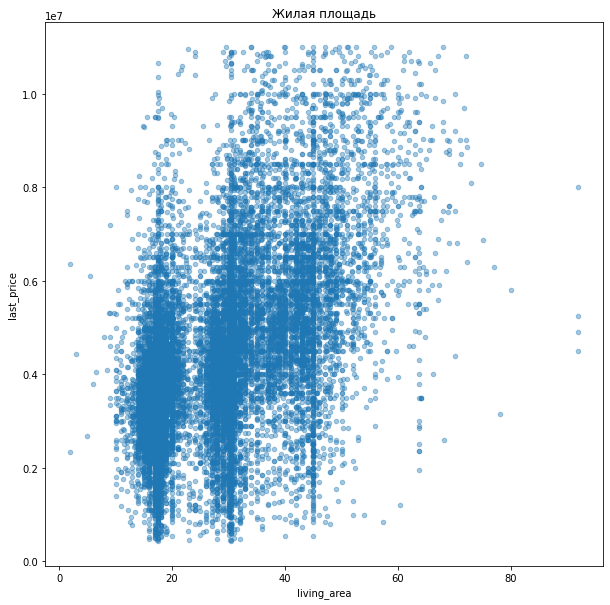

In [81]:
#посмотрим корреляцию цены от жилой площади

factors_price.plot(x='living_area', y='last_price', kind='scatter', alpha=0.4, title='Жилая площадь', figsize=(10,10)) 

<AxesSubplot:title={'center':'Площадь кухни'}, xlabel='kitchen_area', ylabel='last_price'>

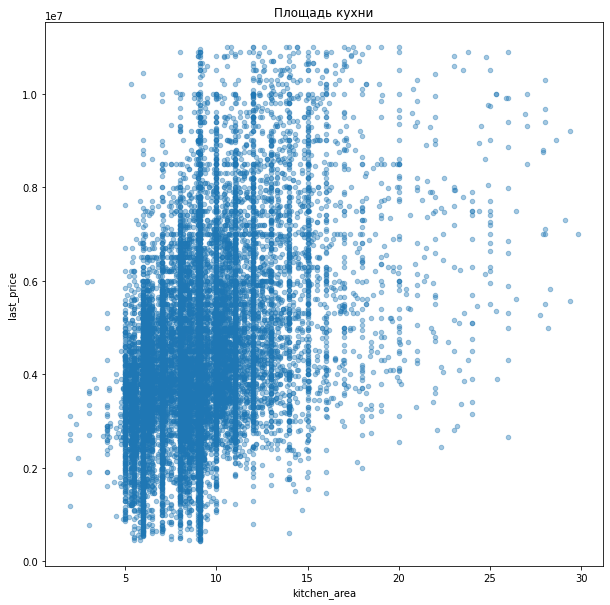

In [82]:
#изучим корреляцию цены от площади кухни

factors_price.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.4, title='Площадь кухни', figsize=(10,10)) 


<AxesSubplot:title={'center':'Число комнат'}, xlabel='rooms', ylabel='last_price'>

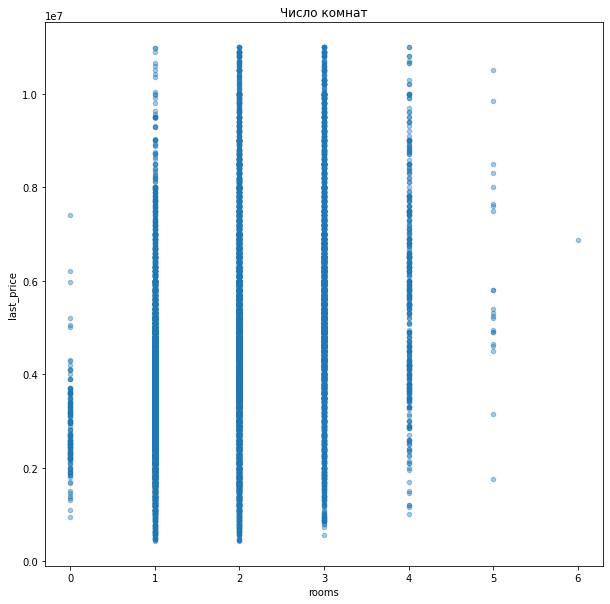

In [83]:
#посмотрим зависимость цены от кол-ва комнат

factors_price.plot(x='rooms', y='last_price', kind='scatter', alpha=0.4, title='Число комнат', figsize=(10,10)) 


<AxesSubplot:xlabel='floor_type'>

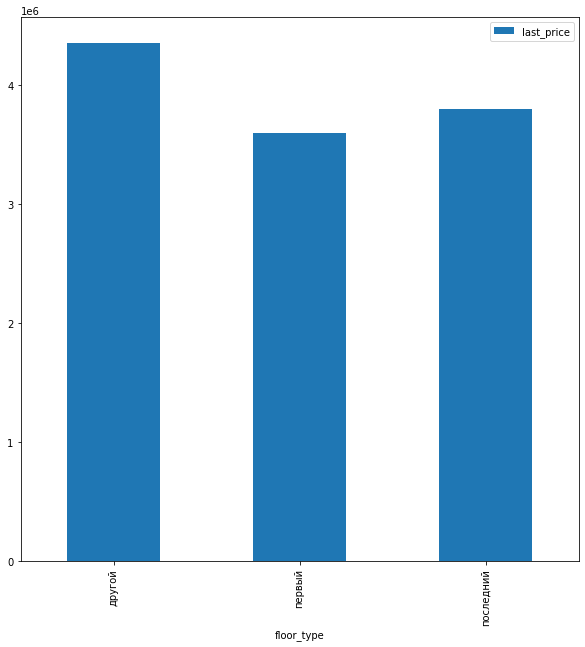

In [84]:
#посмтроим сводбную таблицу, рассчитывающую медиану по типу этажности
factors_price_floor = factors_price.pivot_table(index='floor_type', values = 'last_price', aggfunc = 'median')

#выведем столбчатый график значений
factors_price_floor.plot(kind='bar', figsize=(10,10)) 






<AxesSubplot:title={'center':'Дата размещения'}, xlabel='first_day_exposition', ylabel='last_price'>

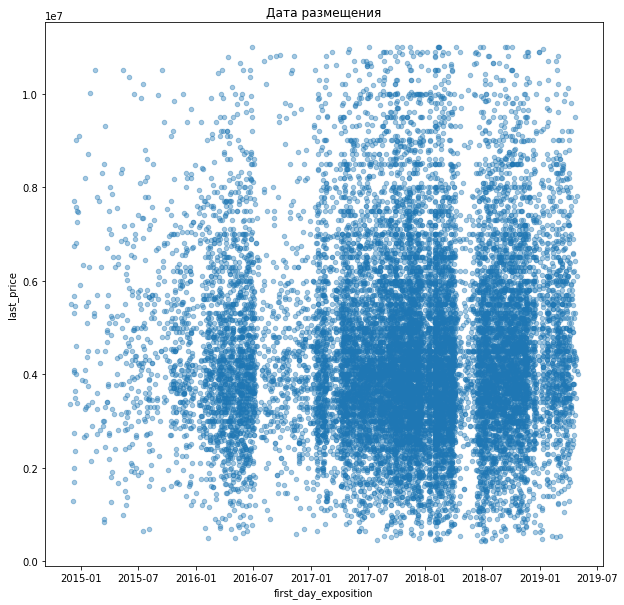

In [85]:
# выведем диаграмму рассеяния для цены и даты выставления на продажу

factors_price.plot(x='first_day_exposition', y='last_price', kind='scatter', alpha=0.4, title='Дата размещения', figsize=(10,10)) 




Вывод:
- Больше всего на стоимость квартиры влияет ее площадь: корреляция этих показателей составляет 0,6.
- По остальным показателям значимой корреляции не выявлено.

### Средняя цена километра в Санкт-Петербурге

In [86]:
#создадим датафрейм квартир Санкт-Петербурга, состоящий из колонок 'locality_name', 'city_centre_km', 'metre_price'
#сохраним его в переменную locality_peter

locality_peter = realty.query('locality_name == "Санкт-Петербург"')

locality_peter = locality_peter[['locality_name', 'city_centre_km', 'metre_price']]

In [87]:
# посмотрим список характерных значений средней стоимости кв.метра

locality_peter['metre_price'].describe()

count     10550.000000
mean     103349.425782
std       21488.743511
min       17391.000000
25%       88636.000000
50%      100275.500000
75%      114867.000000
max      312240.000000
Name: metre_price, dtype: float64

In [88]:
#создадим сводную таблицу, в которой посчитаем среднюю стоимость кв.метра в зависимости от удаленности от центра

km_price = locality_peter.pivot_table(index='city_centre_km', values='metre_price')



<AxesSubplot:xlabel='city_centre_km'>

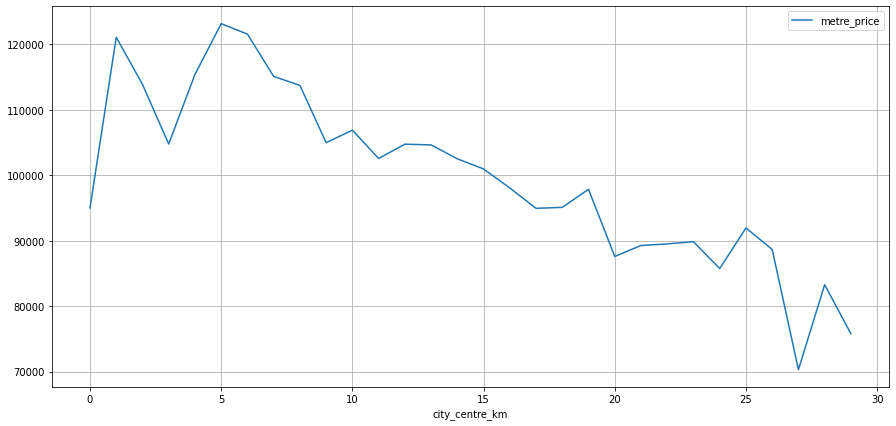

In [89]:
#посмтроим график зависимости цены на квадратный метр от расстояния до центра города

km_price.plot(grid=True, figsize=(15,7))

Вывод:

- Стоимость кв.метра в самом центре ниже, чем на расстоянии 5 км от него.
- Далее рост стоимости кв. метра по мере отдаления от центра постепенно снижается. 
- Средняя стоимость кв.метра в Санкт-Петербурге - 103000.

### Cредняя цена квадратного метра в населённых пунктах

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [90]:
# построим сводную таблицу топ-10 населенных пунктов с наибольшим числом объявлений 
# рассчитаем по каждому среднюю стоимость кв.метра

realty_metre_top = realty.pivot_table(
    index = 'locality_name', 
    values = 'metre_price', 
    aggfunc = ('count','mean')).sort_values(by='count', ascending=False).head(10)

#ранжируем датафрейм по убыванию ср.стоимости кв.метра

realty_metre_top.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,10550,103349.425782
Пушкин,266,98991.184211
Кудрово,425,94404.522353
Парголово,295,89646.827119
Мурино,531,85807.386064
Шушары,392,77886.982143
Колпино,292,74733.068493
Гатчина,251,68288.984064
Всеволожск,321,66668.077882


Самая высокая стоимость кв.метра из 10 населённых пунктов с наибольшим числом объявлений - в Санкт-Петербурге. Самая низкая - в Выборге. 

## Вывод

В проекте мы исследовали датафрейм объявлений о продаже недвижимости Санкт-Петербурга.


На первом этапе мы:
- заполнили большую часть пропусков. Строки с пропусками, которые не влияли на расчеты, мы удалили;
- исследовали аномалии и скорректировали изначальный датасет;
- скорректировали типы данных столбцов.


На этапе исследования мы выяснили, что:
- большая часть объявлений содержит информацию о квартирах в Санкт-Петербурге на 5 этаже общей площадью около 40 кв.метров.
- стоимость большей части квартир находится в диапазоне 3-5 млн рублей;
- число однокомнатных и двухкомнатных квартир в датасете примерно одинаково. Меньше всего в датасете четырехкомнатных квартир;
- больше всего на стоимость квартиры влияет ее площадь и расстояние от центра Санкт-Петербурга;
- средний срок продажи квартиры составляет 147 дней;
- на выходных публикуют в два раза меньше объявлений, чем в будни. Самые активные месяцы публикаций - февраль, март и ноябрь. Меньше всего объявлений публикуют в мае, январе и декабре.

